In [3]:
!nvidia-smi

Wed Dec  4 14:59:01 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.35.03              Driver Version: 560.35.03      CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   54C    P8             10W /   70W |       1MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [4]:
import os
HOME = os.getcwd()
print(HOME)

/kaggle/working


In [5]:
%pip install ultralytics supervision roboflow
import ultralytics
ultralytics.checks()

Ultralytics 8.3.40 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 6013.4/8062.4 GB disk)


In [6]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

/kaggle/working/datasets


In [7]:
from roboflow import Roboflow

rf = Roboflow(api_key="bZ4k4IF0uvX3OudNlwRR")
project = rf.workspace("project-gcm3p").project("pneumonia-detection-paper")
version = project.version(5)
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Pneumonia-detection-paper-5 in yolov11:: 100%|██████████| 6362/6362 [00:00<00:00, 8535.20it/s]


In [9]:
%cd {HOME}

!yolo task=detect mode=train model=yolo11s-seg.pt data={dataset.location}/data.yaml epochs=50 imgsz=640 plots=True

/kaggle/working
100%|██████████████████████████████████████| 19.7M/19.7M [00:00<00:00, 29.8MB/s]
WARNING ⚠️ conflicting 'task=detect' passed with 'task=segment' model. Ignoring 'task=detect' and updating to 'task=segment' to match model.
Ultralytics 8.3.40 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=segment, mode=train, model=yolo11s-seg.pt, data=/kaggle/working/datasets/Pneumonia-detection-paper-5/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True

In [10]:
!ls {HOME}/runs/segment/train

BoxF1_curve.png					   results.png
BoxPR_curve.png					   train_batch0.jpg
BoxP_curve.png					   train_batch1.jpg
BoxR_curve.png					   train_batch2.jpg
MaskF1_curve.png				   train_batch4120.jpg
MaskPR_curve.png				   train_batch4121.jpg
MaskP_curve.png					   train_batch4122.jpg
MaskR_curve.png					   val_batch0_labels.jpg
args.yaml					   val_batch0_pred.jpg
confusion_matrix.png				   val_batch1_labels.jpg
confusion_matrix_normalized.png			   val_batch1_pred.jpg
events.out.tfevents.1733324571.33ffd99913bc.240.0  val_batch2_labels.jpg
labels.jpg					   val_batch2_pred.jpg
labels_correlogram.jpg				   weights
results.csv


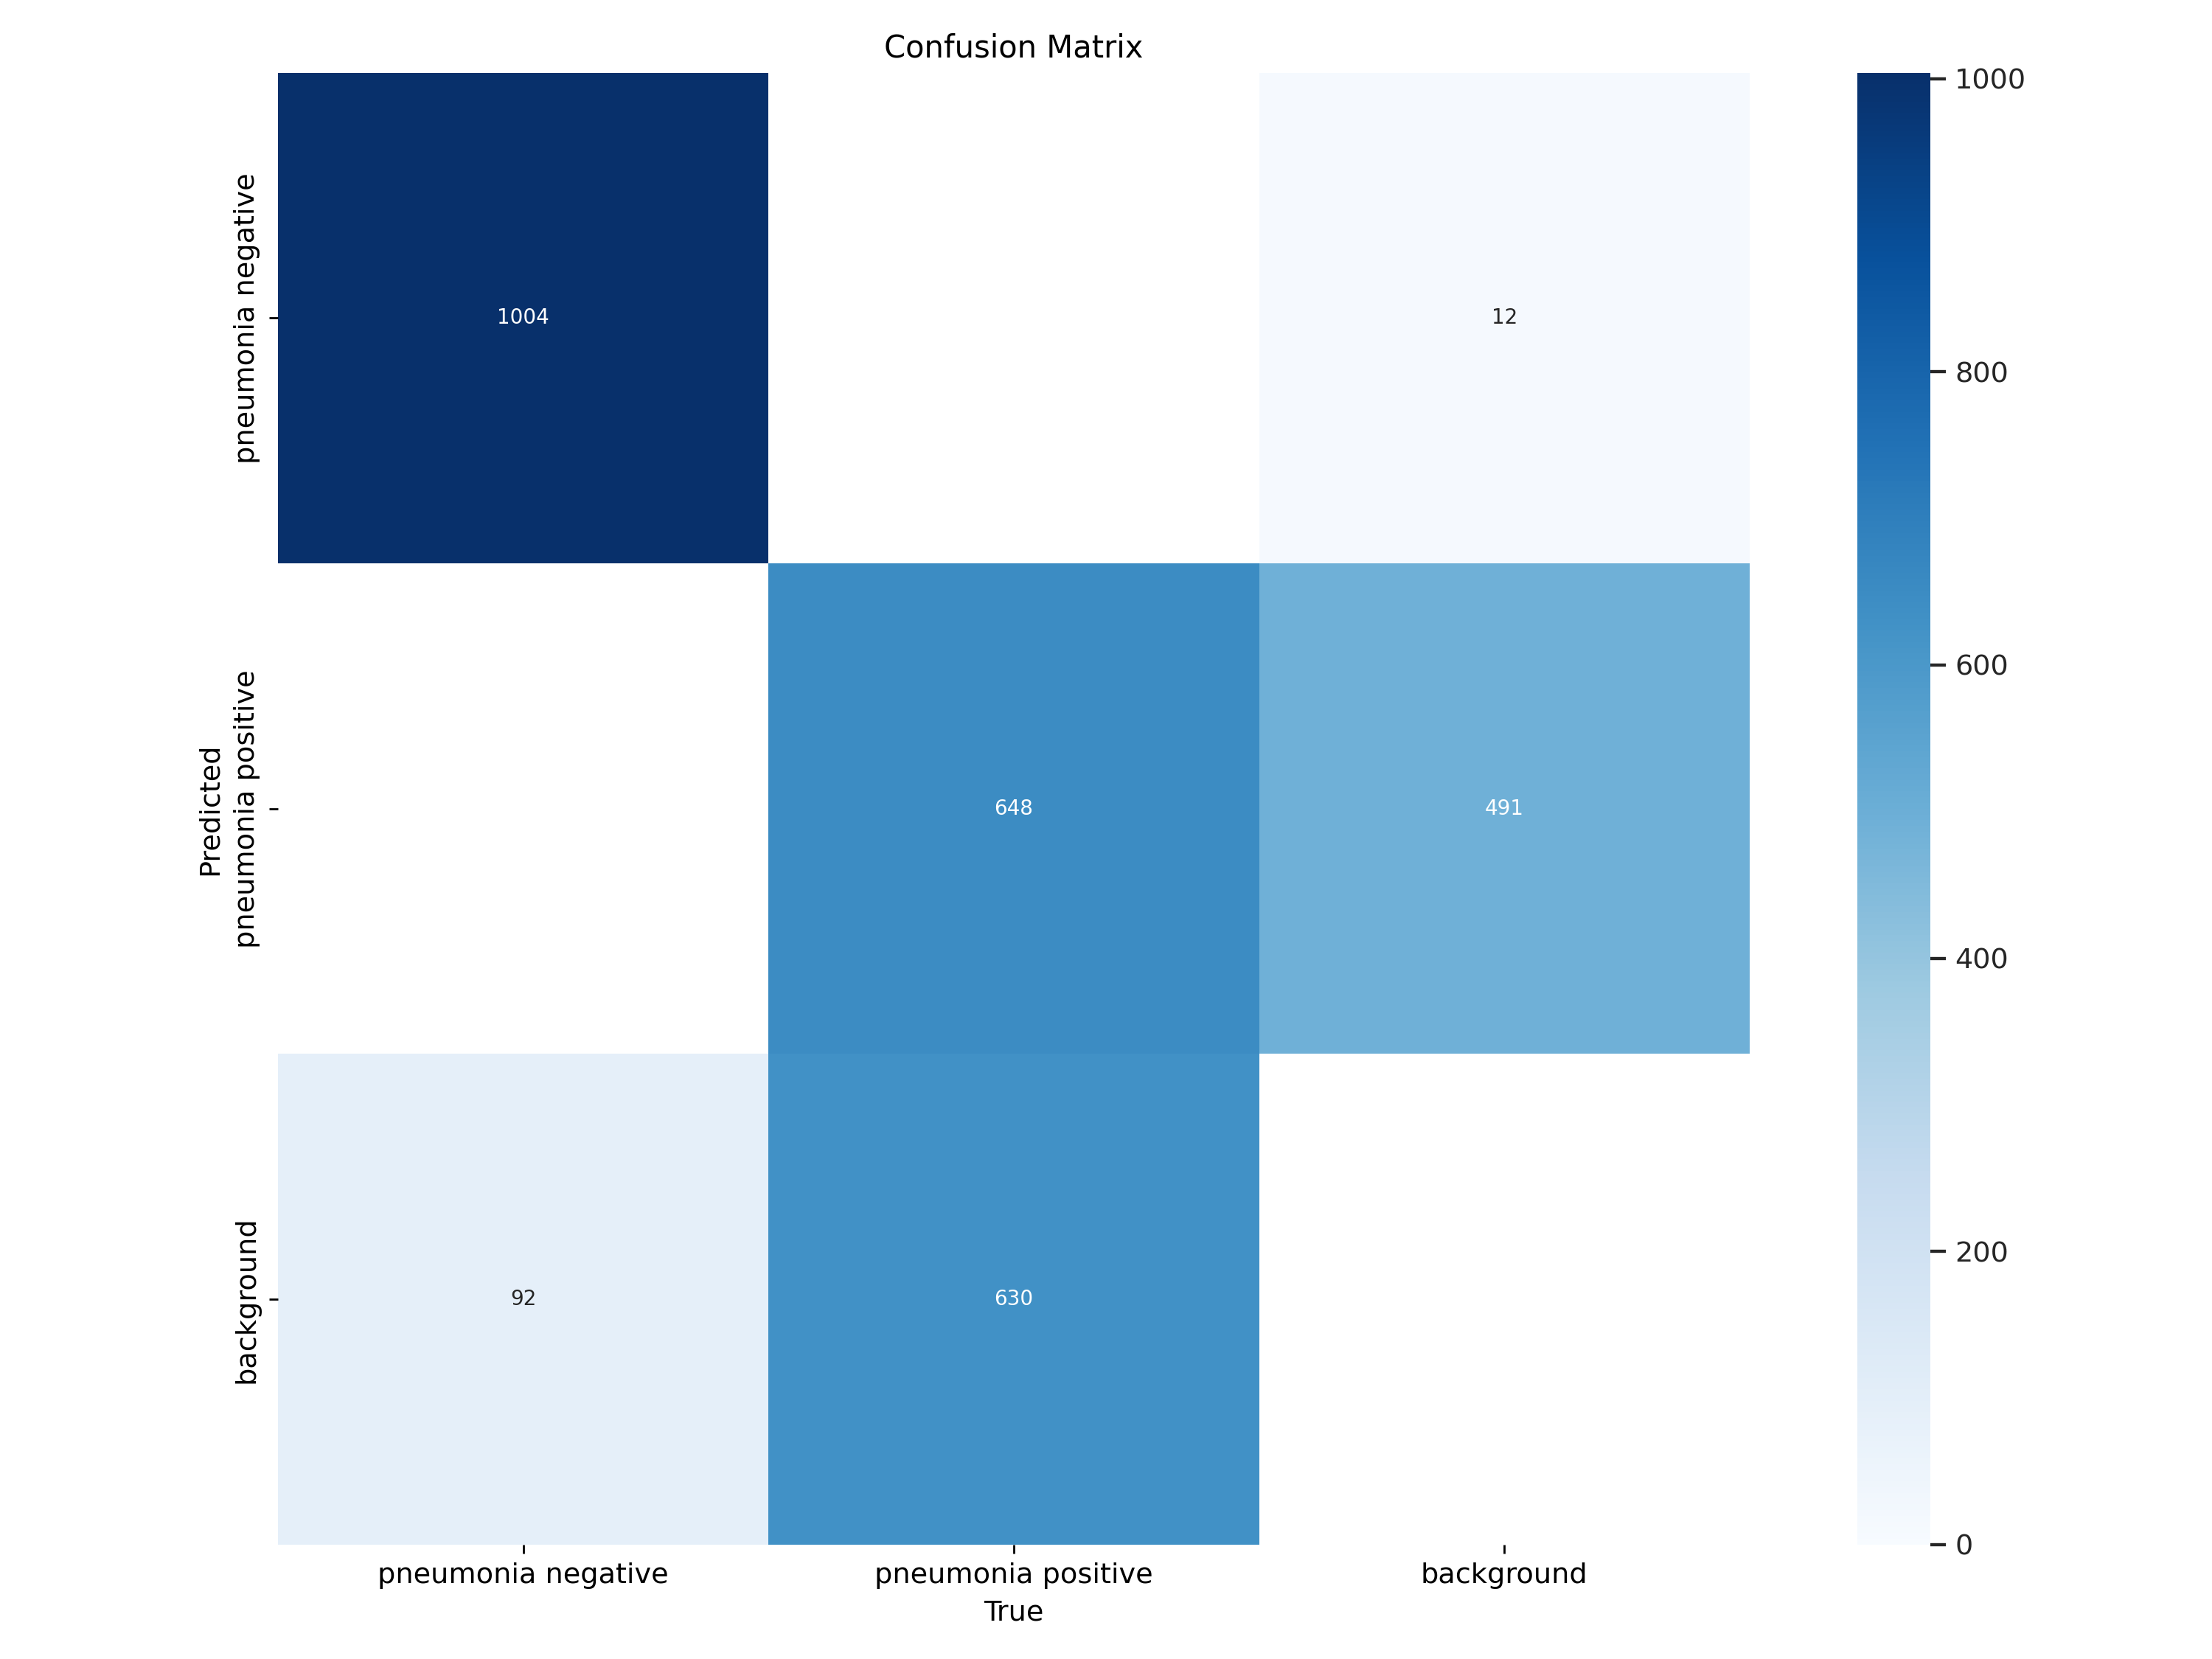

In [12]:
from IPython.display import Image as IPyImage

IPyImage(filename=f"{HOME}/runs/segment/train/confusion_matrix.png", width=600)

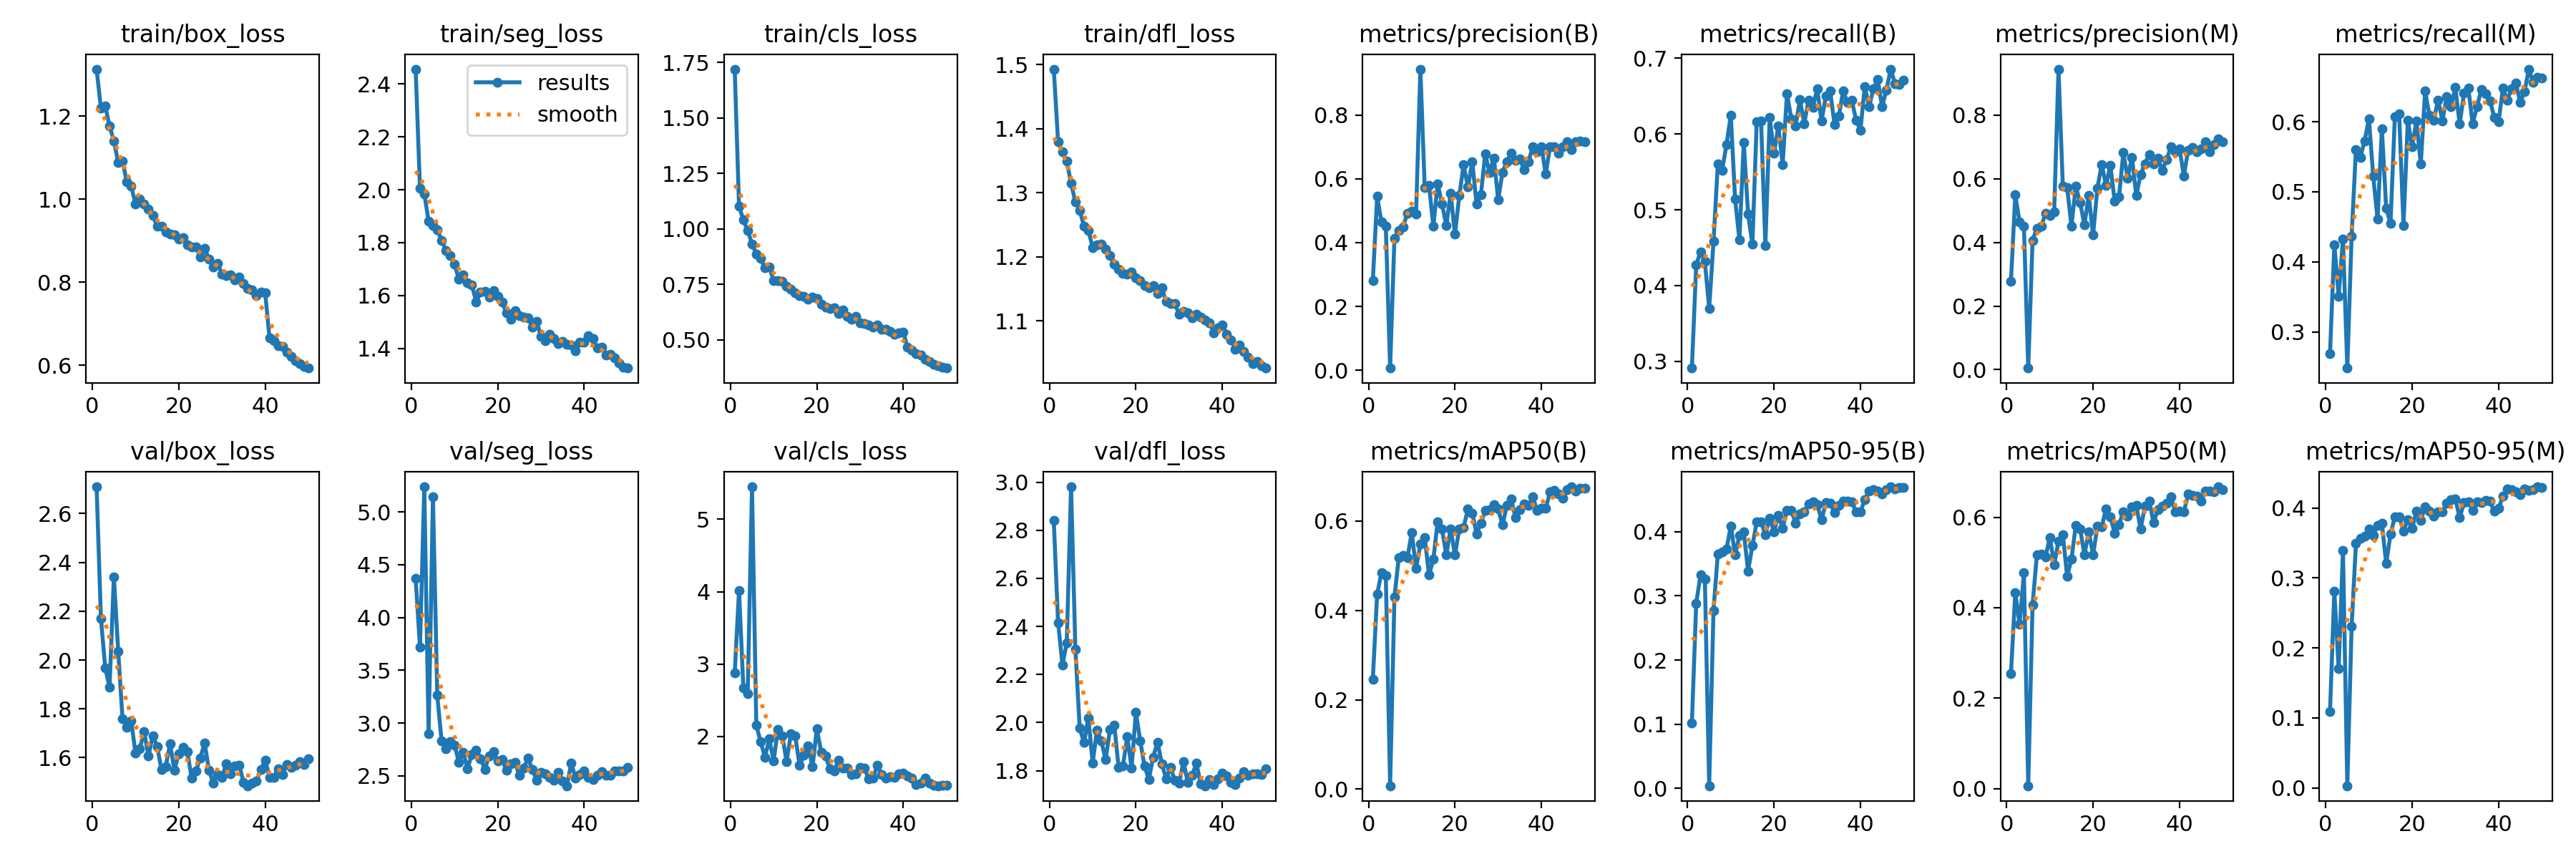

In [13]:
IPyImage(filename=f"{HOME}/runs/segment/train/results.png", width=600)

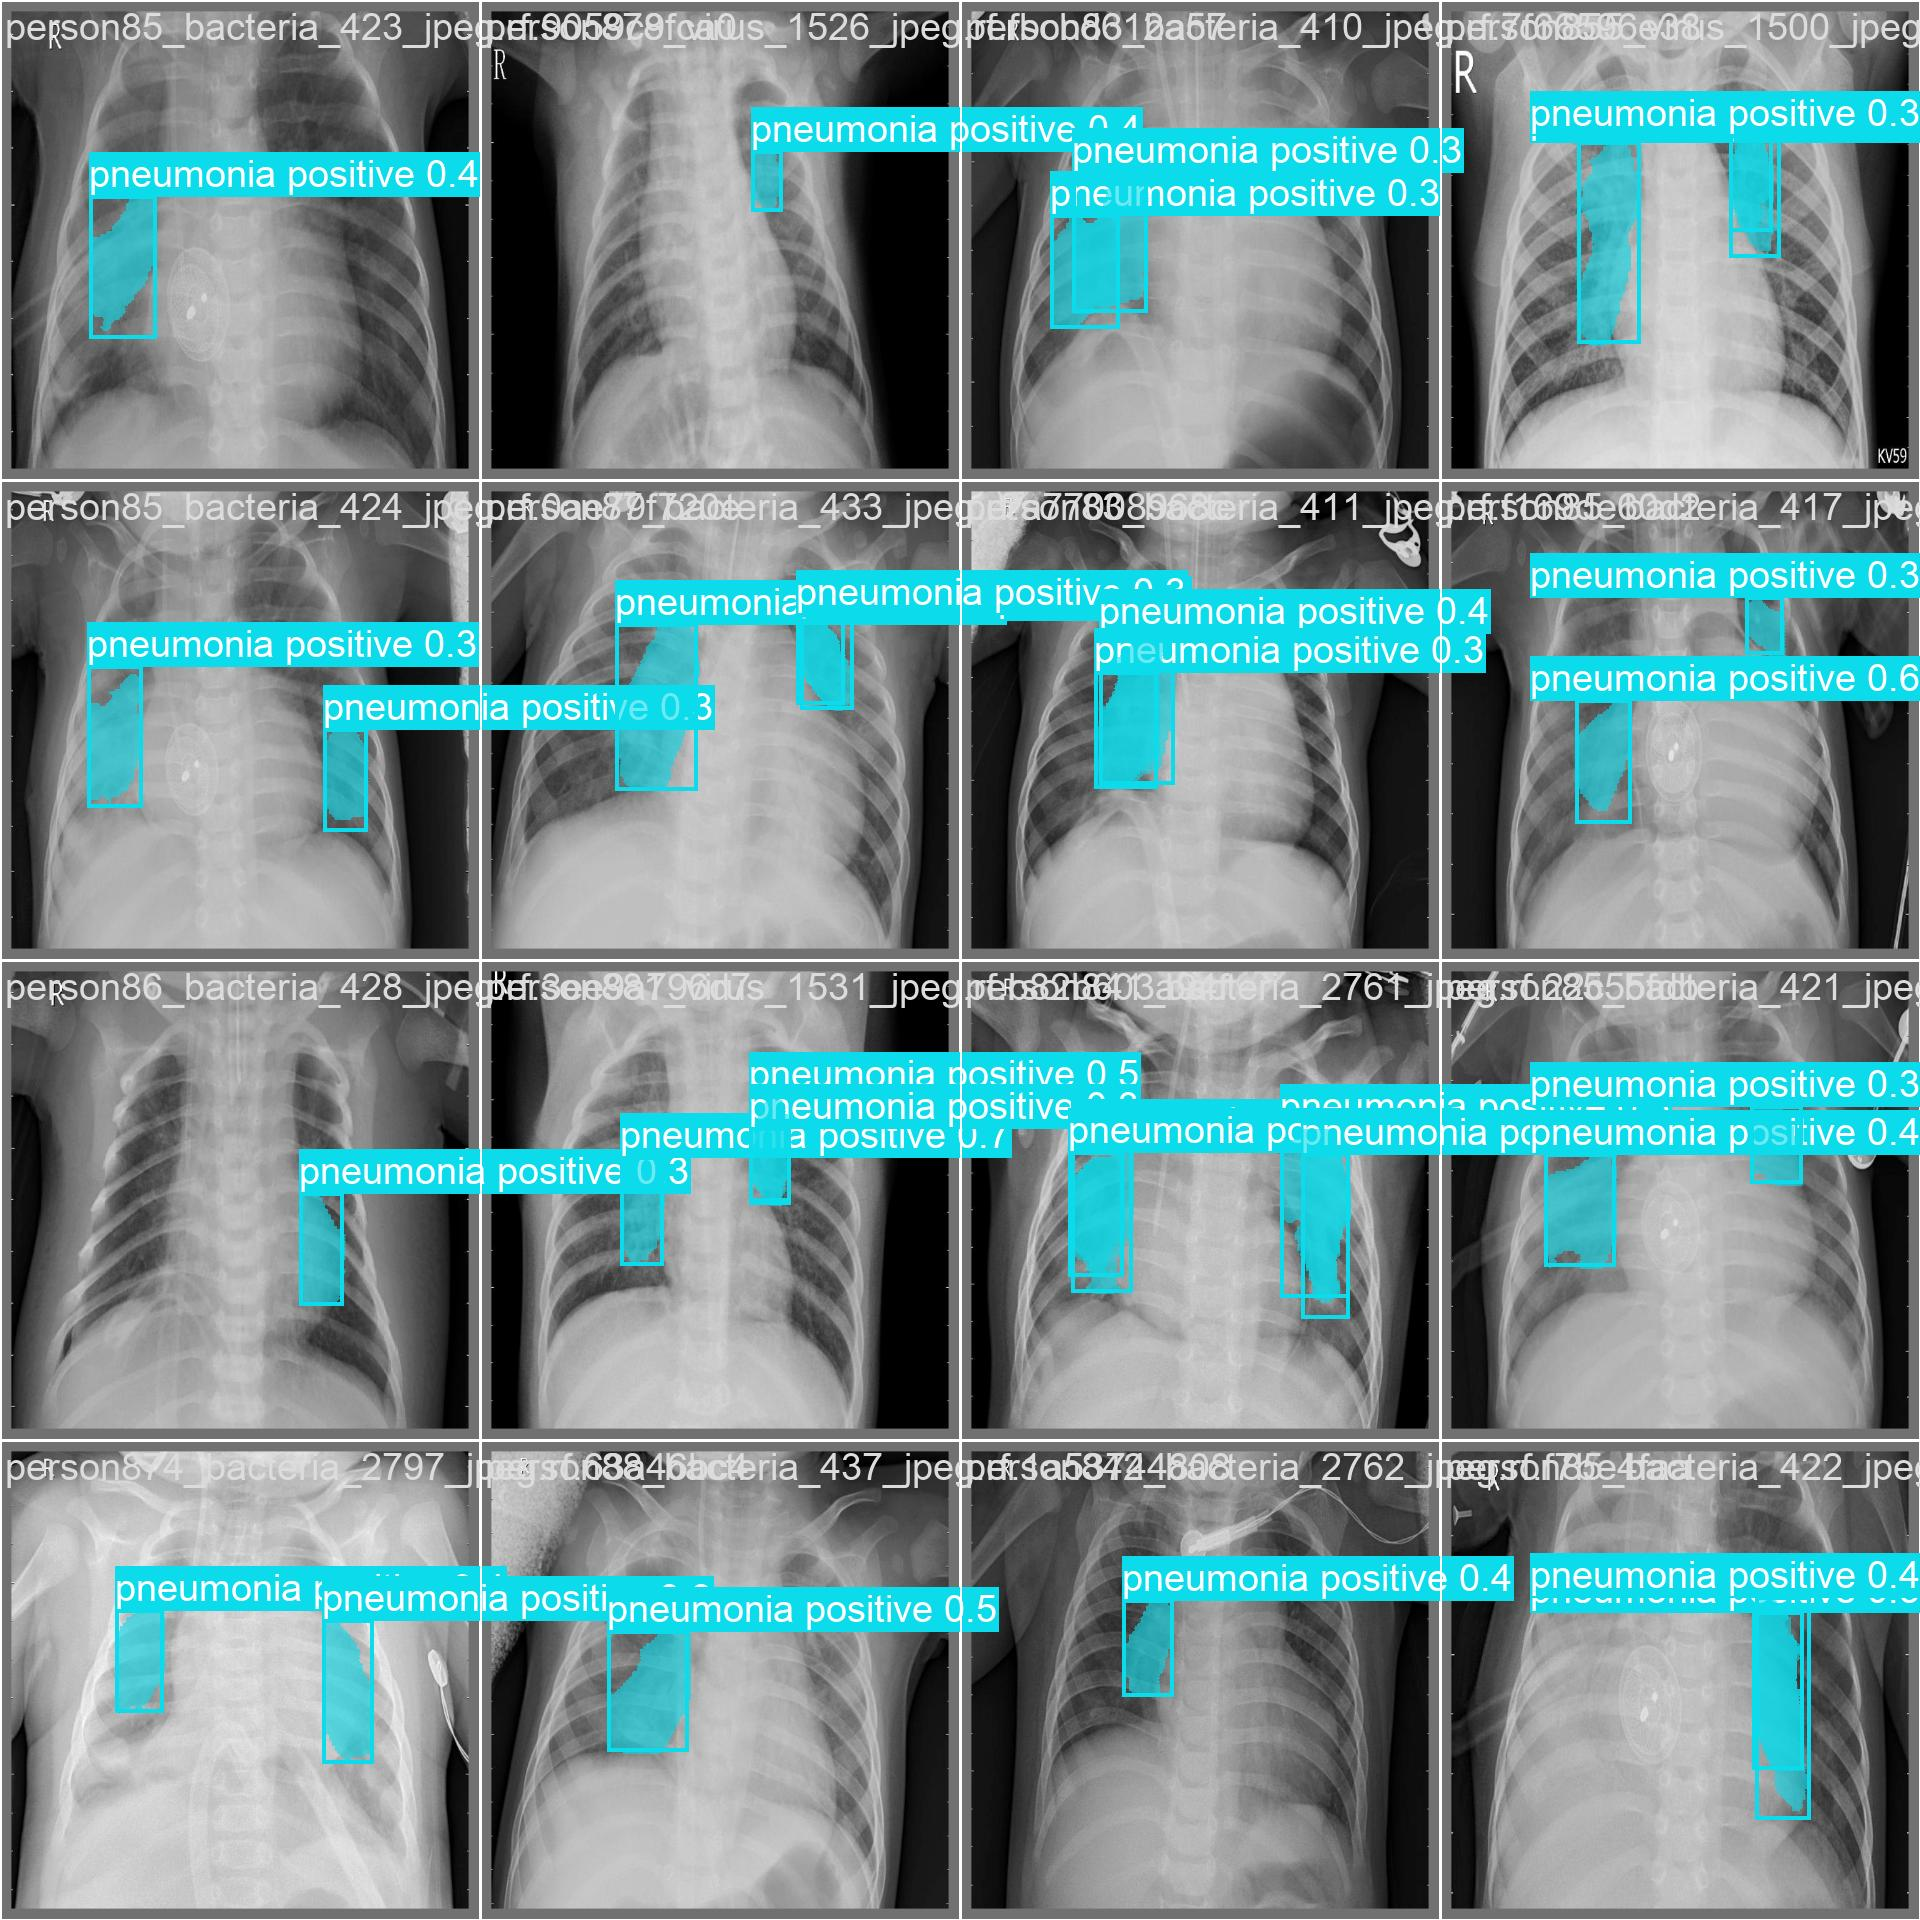

In [14]:
IPyImage(filename=f"{HOME}/runs/segment/train/val_batch0_pred.jpg", width=600)

In [15]:
!yolo task=detect mode=val model={HOME}/runs/segment/train/weights/best.pt data={dataset.location}/data.yaml

WARNING ⚠️ conflicting 'task=detect' passed with 'task=segment' model. Ignoring 'task=detect' and updating to 'task=segment' to match model.
Ultralytics 8.3.40 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s-seg summary (fused): 265 layers, 10,067,590 parameters, 0 gradients, 35.3 GFLOPs
val: Scanning /kaggle/working/datasets/Pneumonia-detection-paper-5/valid/labels.
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all       1182       2374      0.718      0.667      0.672      0.469      0.724      0.664      0.668       0.43
    pneumonia negative        548       1096      0.975      0.914      0.978      0.828      0.975      0.913      0.977      0.764
    pneumonia positive        634       1278       0.46       0.42      0.366       0.11      0.473      0.414      0.358     0.0963
Speed: 0.5ms preprocess, 11.2ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/segment/val
💡 Learn more at 

In [16]:
!yolo task=detect mode=predict model={HOME}/runs/segment/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

WARNING ⚠️ conflicting 'task=detect' passed with 'task=segment' model. Ignoring 'task=detect' and updating to 'task=segment' to match model.
Ultralytics 8.3.40 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s-seg summary (fused): 265 layers, 10,067,590 parameters, 0 gradients, 35.3 GFLOPs

image 1/345 /kaggle/working/datasets/Pneumonia-detection-paper-5/test/images/106_jpeg.rf.82d1982ab581e4af2b9ed924bea62aeb.jpg: 640x640 (no detections), 20.2ms
image 2/345 /kaggle/working/datasets/Pneumonia-detection-paper-5/test/images/10_jpeg.rf.fe9f1861e3f185850d58985daece247b.jpg: 640x640 2 pneumonia positives, 20.2ms
image 3/345 /kaggle/working/datasets/Pneumonia-detection-paper-5/test/images/142_jpeg.rf.94beaaa3d457574c274758c1d135fe2c.jpg: 640x640 2 pneumonia positives, 20.2ms
image 4/345 /kaggle/working/datasets/Pneumonia-detection-paper-5/test/images/152_jpeg.rf.915c077ebdf8ebae82d3dde3348e7ab7.jpg: 640x640 3 pneumonia positives, 20.2ms
image 5/345 /kaggle/working/datasets/Pne

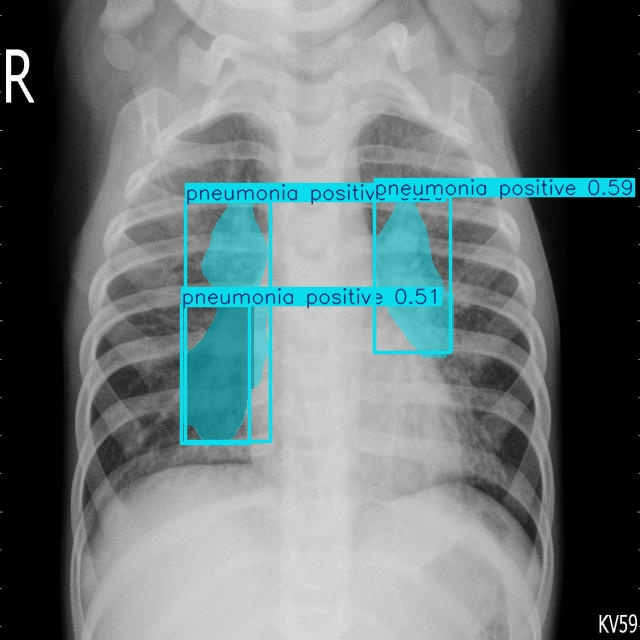

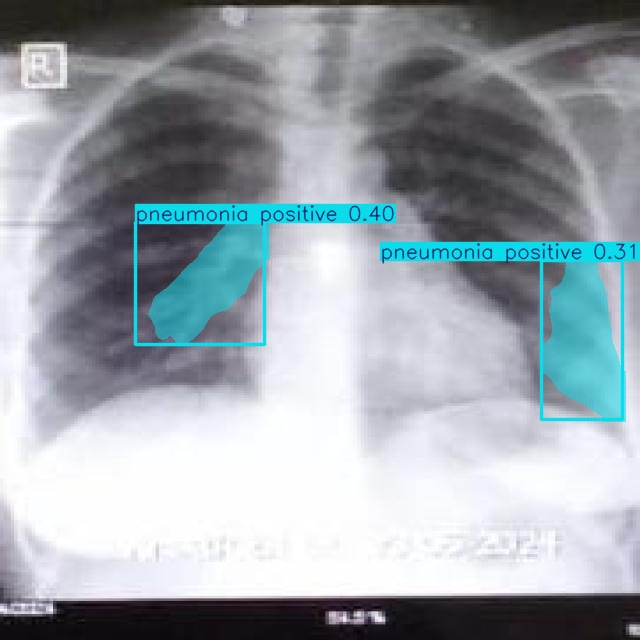

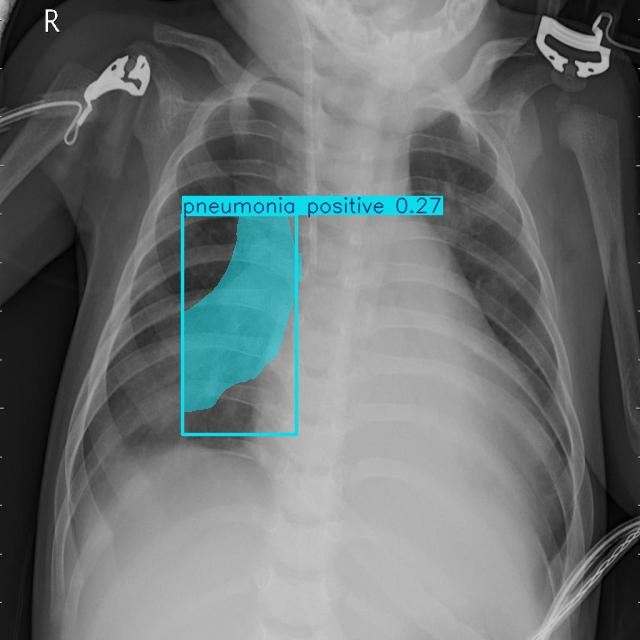

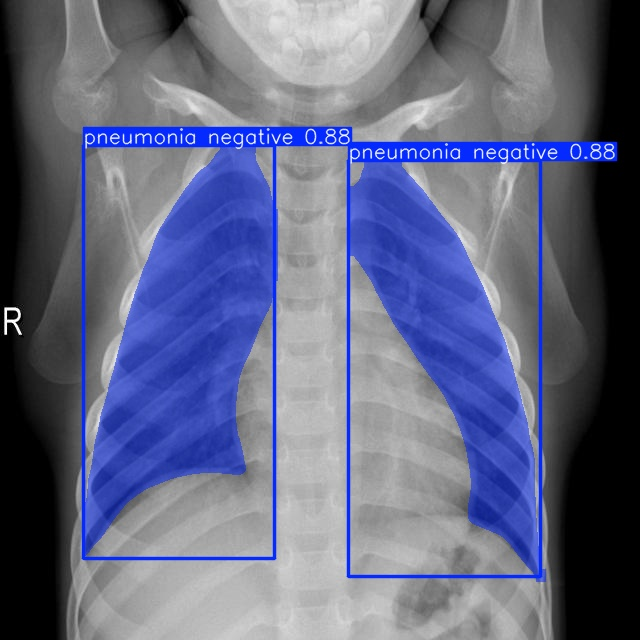

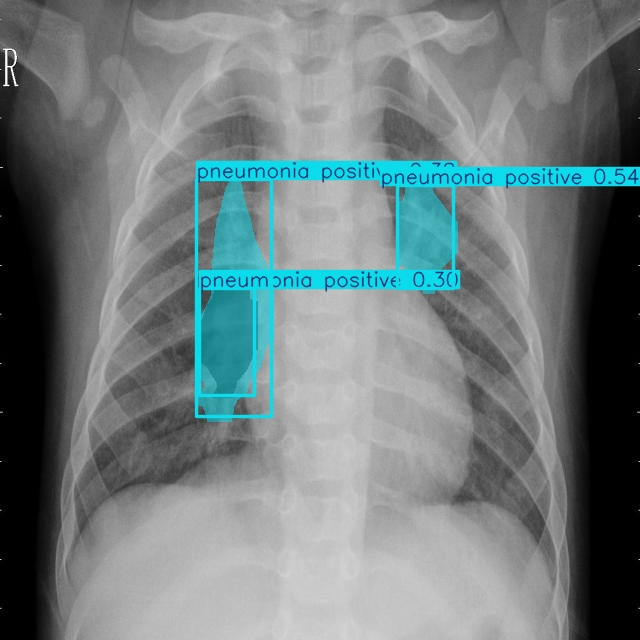

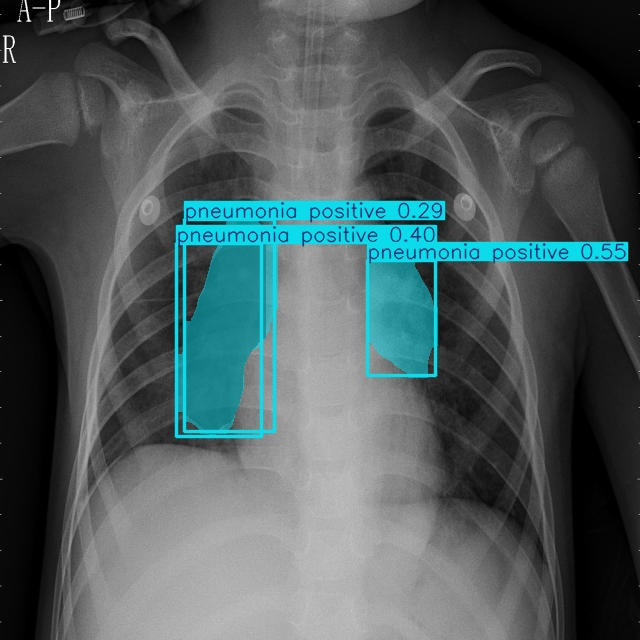

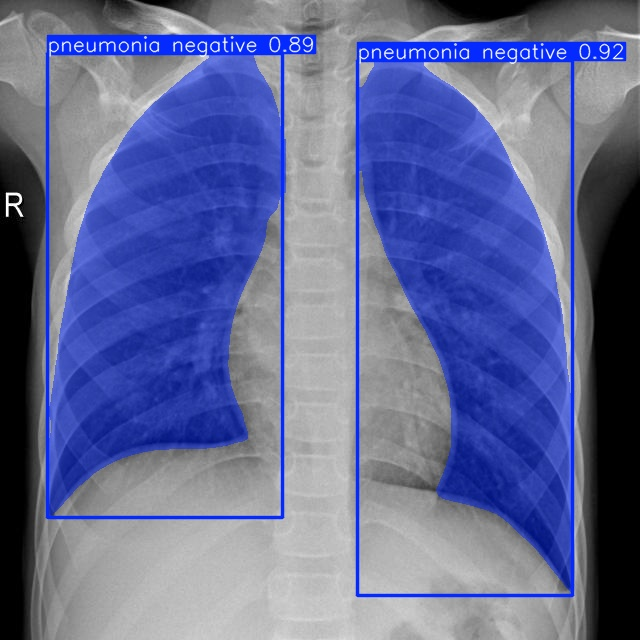

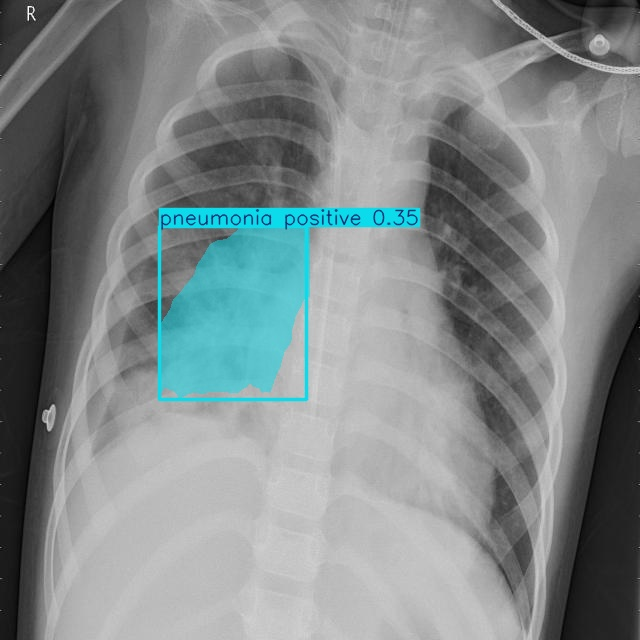

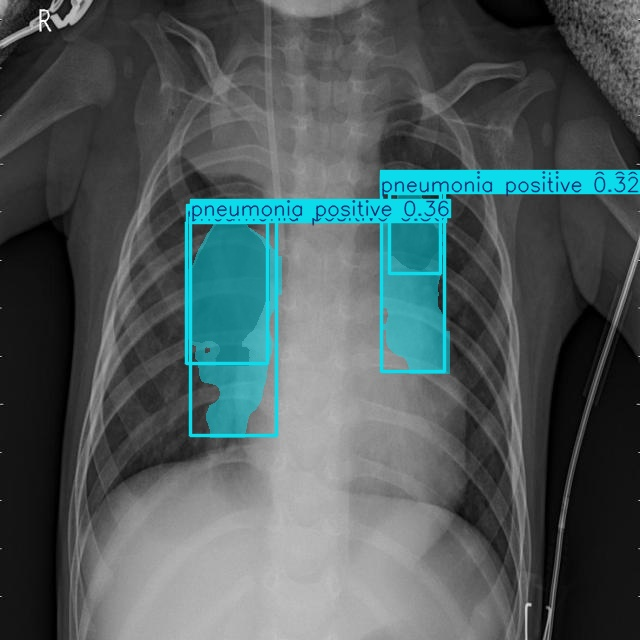

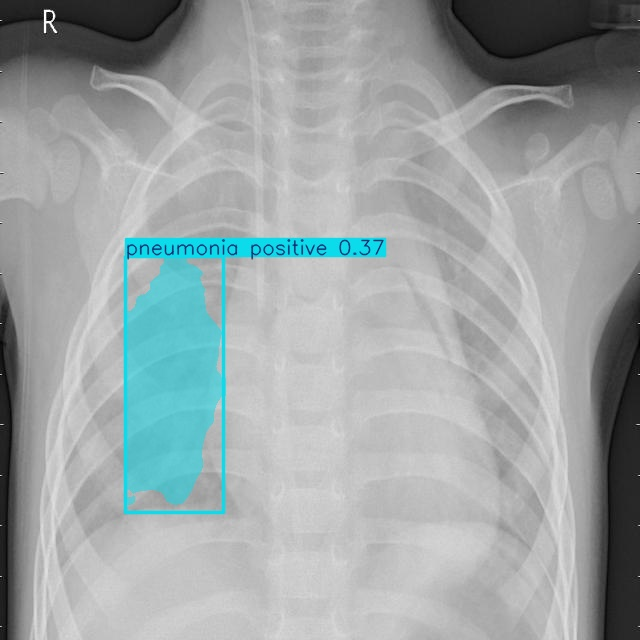

In [18]:
import glob
from IPython.display import Image as IPyImage, display

lastest_folder = max(glob.glob(f"{HOME}/runs/segment/predict*/"), key=os.path.getmtime)
for img in glob.glob(f'{lastest_folder}/*.jpg')[:10]:
    display(IPyImage(filename=img, width=600))
    print('\n')